In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
aes = ["aes", "plain"]
con = ["con", "coff"]
size = ["1", "10", "100"]
broker = ["kafka", "mosquitto"]
order = ["1st", "2nd"]

kafka_w_msg_count =np.zeros((2, 2))
mqtt_w_msg_count =np.zeros((2, 2))
kafka_r_msg_count =np.zeros((2, 2))
mqtt_r_msg_count =np.zeros((2, 2))
kafka_w_bytes =np.zeros((2, 2))
mqtt_w_bytes =np.zeros((2, 2))
kafka_r_bytes =np.zeros((2, 2))
mqtt_r_bytes =np.zeros((2, 2))

# グラフの情報
fig_w = 12
fig_h = 12
margin = 0.3
w = 0.3
x1 = 1
x2 = 3
x3 = 5
label_lst = ["kafka_1st", "kafka_2nd", "mqtt_1st", "mqtt_2nd"]
# print(kafka_w_msg_count.shape)

In [3]:
for i, a in enumerate(aes):
    for b in broker:
        for j, o in enumerate(order): 
            file = a+"-coff-10-"+o+"-"+b+".tsv"
            df = pd.read_table("result/" +  file)
            if b == "kafka":
                kafka_w_msg_count[j][i] = df["writer_msg_count_rate"][0]
                kafka_r_msg_count[j][i] = df["reader_msg_count_rate"][0]
                kafka_w_bytes[j][i] = df["writer_msg_bytes_rate"][0]
                kafka_r_bytes[j][i] = df["reader_msg_bytes_rate"][0]
            else:
                mqtt_w_msg_count[j][i] = df["writer_msg_count_rate"][0]
                mqtt_r_msg_count[j][i] = df["reader_msg_count_rate"][0]
                mqtt_w_bytes[j][i] = df["writer_msg_bytes_rate"][0]
                mqtt_r_bytes[j][i] = df["reader_msg_bytes_rate"][0]
# aes-1st-kafka, plain-1st-kafka, aes-2nd-kafka, plain-2nd-kafka
# 49.5049505, 107.9136691, 104.1666667, 155.4404145    

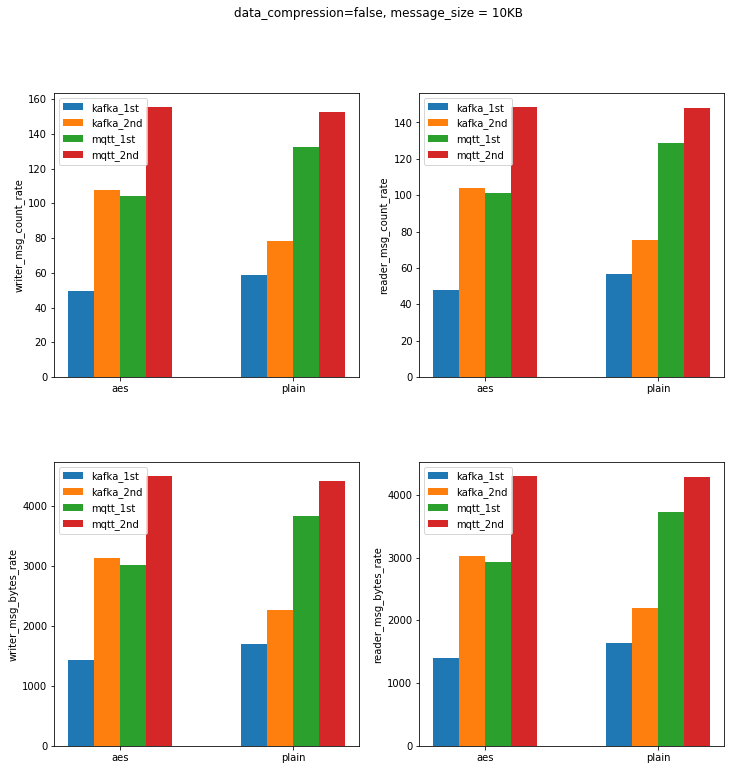

In [4]:
data_lst_w = [kafka_w_msg_count[0], kafka_w_msg_count[1], mqtt_w_msg_count[0], mqtt_w_msg_count[1]]
data_lst_r = [kafka_r_msg_count[0], kafka_r_msg_count[1], mqtt_r_msg_count[0], mqtt_r_msg_count[1]]
bytes_lst_w = [kafka_w_bytes[0], kafka_w_bytes[1], mqtt_w_bytes[0], mqtt_w_bytes[1]]
bytes_lst_r = [kafka_r_bytes[0], kafka_r_bytes[1], mqtt_r_bytes[0], mqtt_r_bytes[1]]

# グラフの準備
fig, ax = plt.subplots(2, 2, figsize=(fig_w, fig_h))
# 余白
plt.subplots_adjust(hspace=margin)
# 描画
for i, d in enumerate(data_lst_w):
    ax[0, 0].bar([x1+w*i, x2+w*i], d, w, label=label_lst[i])
for i, d in enumerate(data_lst_r):
    ax[0, 1].bar([x1+w*i, x2+w*i], d, w, label=label_lst[i])
for i, d in enumerate(bytes_lst_w):
    ax[1, 0].bar([x1+w*i, x2+w*i], d, w, label=label_lst[i])
for i, d in enumerate(bytes_lst_r):
    ax[1, 1].bar([x1+w*i, x2+w*i], d, w, label=label_lst[i])
    
for i in range(2):
    for j in range(2):
    # 凡例
        ax[i][j].legend(loc=2)
        ax[i][j].set_xticks([x1+w+w/2, x2+w+w/2])
        ax[i][j].set_xticklabels(aes)
ax[0, 0].set_ylabel('writer_msg_count_rate')
ax[0, 1].set_ylabel('reader_msg_count_rate')
ax[1, 0].set_ylabel('writer_msg_bytes_rate')
ax[1, 1].set_ylabel('reader_msg_bytes_rate')
fig.suptitle("data_compression=false, message_size = 10KB")
plt.show()